# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [24]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
path_data = './heart_disease/processed.cleveland.DATA'

df = pd.read_csv(path_data, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [25]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [26]:
# Função que plota gráfico de bivariada
def plot_bivariada(df, variavel_resposta: str, variavel_explicativa: str):
    ax = plt.subplots(figsize=(6,3))
    ax = sns.barplot(df, x=variavel_resposta, y=variavel_explicativa, orient='h', palette="Set2", errorbar=('ci', False))
    ax.bar_label(ax.containers[0], fmt="%.2f",padding=5)
    sns.despine(right=True, top=True)
    plt.show()

# Função que retorna dataframe da bivariada com variável qualitativas
def df_bivariada(df, variavel_resposta: str, variavel_explicativa: str):
    df_result = pd.crosstab(df[variavel_explicativa], df[variavel_resposta], margins=True)
    df_result['media_doentes'] = (df_result[0] + df_result[1]) / 2
    df_result['risco_do_evento'] = df_result[1]/df_result['All']
    df_result['odds'] = df_result[1]/df_result[0]
    df_result['odds_ratio_all'] = df_result['odds']/df_result.loc['All','odds']
    df_result['logito'] = np.log(df_result['odds'])
    df_result['WOE'] = np.log(df_result['odds_ratio_all'])
    return df_result

In [27]:
df_bivariada(df, 'flag_doente', 'sex')

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
sex,,,,,,,,,
0.0,72,25,97,48.5,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,103.0,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


In [28]:
df_bivariada(df, 'flag_doente', 'cp')

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
cp,,,,,,,,,
1.0,16,7,23,11.5,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,25.0,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,43.0,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,72.0,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


In [29]:
df_bivariada(df, 'flag_doente', 'restecg')

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
restecg,,,,,,,,,
0.0,95,56,151,75.5,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,2.0,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,74.0,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


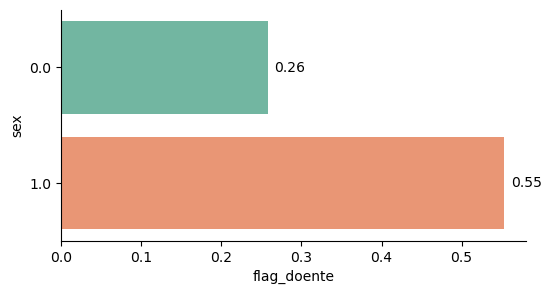

In [30]:
plot_bivariada(df, df['flag_doente'], df['sex'])

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [31]:
# Função que retorna dataframe da bivariada com variável quantitativa
def df_bivariada(df, variavel_resposta: str, variavel_explicativa: str, numero_de_categorias=5):
    # Criando variável categórica
    df['cat_'+variavel_explicativa] = pd.qcut(df[variavel_explicativa], numero_de_categorias, precision=0)
    # Gravando o nome dessa nova coluna em uma variável
    variavel_categorica = df['cat_'+variavel_explicativa].name
    # Passando a variável "variavel_categorica" para explicitar a existência de uma coluna nova no código
    df_result = pd.crosstab(df[variavel_categorica], df[variavel_resposta], margins=True)
    df_result['media_doentes'] = (df_result[0] + df_result[1]) / 2
    df_result['risco_do_evento'] = df_result[1]/df_result['All']
    df_result['odds'] = df_result[1]/df_result[0]
    df_result['odds_ratio_all'] = df_result['odds']/df_result.loc['All','odds']
    df_result['logito'] = np.log(df_result['odds'])
    df_result['WOE'] = np.log(df_result['odds_ratio_all'])
    return df_result

In [32]:
df_bivariada(df, 'flag_doente', 'age', 4)

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
cat_age,,,,,,,,,
"(28.0, 48.0]",58,24,82,41.0,0.292683,0.413793,0.488216,-0.882389,-0.716997
"(48.0, 56.0]",49,31,80,40.0,0.387500,0.632653,0.746440,-0.457833,-0.292441
"(56.0, 61.0]",23,47,70,35.0,0.671429,2.043478,2.411010,0.714653,0.880046
"(61.0, 77.0]",34,37,71,35.5,0.521127,1.088235,1.283961,0.084557,0.249950
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


In [33]:
df_bivariada(df, 'flag_doente', 'thalach', 4)

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
cat_thalach,,,,,,,,,
"(70.0, 134.0]",20,56,76,38.0,0.736842,2.800000,3.303597,1.029619,1.195012
"(134.0, 153.0]",37,41,78,39.0,0.525641,1.108108,1.307408,0.102654,0.268047
"(153.0, 166.0]",47,28,75,37.5,0.373333,0.595745,0.702893,-0.517943,-0.352551
"(166.0, 202.0]",60,14,74,37.0,0.189189,0.233333,0.275300,-1.455287,-1.289895
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [34]:
reglog = smf.logit('flag_doente ~ sex + C(cp) + trestbps + age', data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.3097
Time:                        08:08:20   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.3407      1.621     -5.145      0.000     -11.518      -5.163
C(cp)[T.2.0]    -0.0617      0.636     -0.097      0.923      -1.309       1.186
C(cp)[T.3.0]     0.0715      0.573      0.125      0.901      -1.051       1.194
C(cp)[T.4.0]     2.4789      0.553      4.485      0.000       1.396       3.562
sex              1.8094      0.353      5.130      0.000       1.118       2.501
trestbps         0.0193      0.009      2.261      0.024       0.003       0.036
age              0.0567      0.018      3.120      0.002       0.021       0.092
================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [35]:
# Copiando df
df2 = df.copy()

# Probabilidade de evento predita segundo o modelo
df2['predito'] = reglog.predict(df2)
df2.head()

# Categorizando essa probabilidade em G=5 grupos
df2['cat_pred'] = pd.qcut(df2['predito'], 5)

group_reg = df2.groupby('cat_pred').count().sort_index()
df_de_calibragem = group_reg[['age']].rename(columns={'age':'contagem'})
df_de_calibragem['predito'] = df2.groupby('cat_pred')['predito'].mean().sort_index()
df_de_calibragem['taxa_de_eventos'] = df2.groupby('cat_pred')['flag_doente'].mean().sort_index()
df_de_calibragem


,contagem,predito,taxa_de_eventos
cat_pred,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


Text(0.5, 0, 'Grupo')

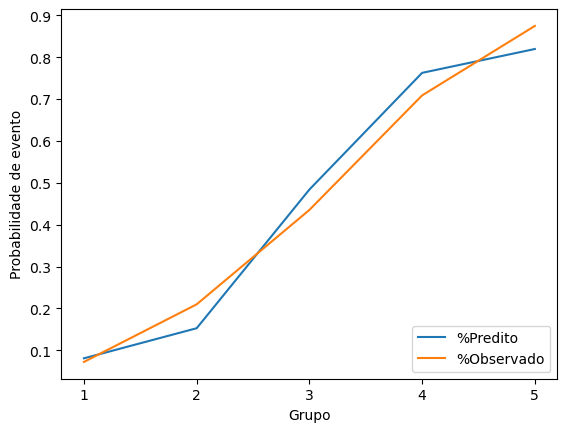

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = df_de_calibragem['taxa_de_eventos'].plot(label='%Predito')
ax = df_de_calibragem['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [39]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df2['flag_doente'], df2['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df2.loc[df2['flag_doente'] == 1, 'predito'], df2.loc[df2['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [40]:
reglog_melhorado = smf.logit('flag_doente ~ sex + exang + oldpeak + C(ca)', data=df).fit()

reglog_melhorado.summary()

Optimization terminated successfully.
         Current function value: 0.423038
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Nov 2023   Pseudo R-squ.:                  0.3867
Time:                        08:09:11   Log-Likelihood:                -128.18
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.462e-31
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.1316      0.392     -7.980      0.000      -3.901      -2.362
C(ca)[T.1.0]     1.7802      0.385      4.627      0.000       1.026       2.534
C(ca)[T.2.0]     2.5008      0.533      4.694      0.000       1.457       3.545
C(ca)[T.3.0]     2.4854      0.712      3.490      0.000       1.090       3.881
C(ca)[T.?]       0.1130      1.267      0.089      0.929      -2.370       2.596
sex              1.2660      0.357      3.551      0.000       0.567       1.965
exang            1.7681      0.350      5.053      0.000       1.082       2.454
oldpeak          0.6610      0.160      4.135      0.000       0.348       0.974
================================================================================
"""

## Verificação da calibragem do modelo

In [41]:
# Copiando df
df3 = df.copy()

# Probabilidade de evento predita segundo o modelo
df3['predito'] = reglog.predict(df3)

# Categorizando essa probabilidade em G=5 grupos
df3['cat_pred'] = pd.qcut(df3['predito'], 5)

group_reg = df3.groupby('cat_pred').count().sort_index()
df_de_calibragem_melhorado = group_reg[['age']].rename(columns={'age':'contagem'})
df_de_calibragem_melhorado['predito'] = df3.groupby('cat_pred')['predito'].mean().sort_index()
df_de_calibragem_melhorado['taxa_de_eventos'] = df3.groupby('cat_pred')['flag_doente'].mean().sort_index()
df_de_calibragem_melhorado

,contagem,predito,taxa_de_eventos
cat_pred,,,
"(0.0131, 0.143]",62,0.072008,0.080645
"(0.143, 0.287]",59,0.209626,0.152542
"(0.287, 0.586]",62,0.435175,0.483871
"(0.586, 0.822]",59,0.708861,0.762712
"(0.822, 0.944]",61,0.874819,0.819672


## Verificação da acurácia do modelo

Acurácia = 0.8519


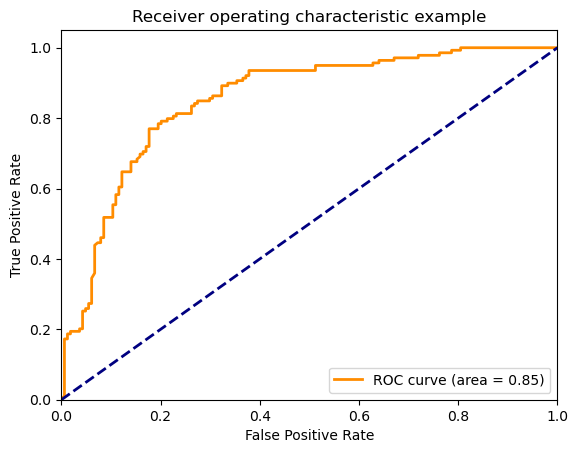

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(df3['flag_doente'], df3['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df3['flag_doente'], df3['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

print("Acurácia = %.4f" % auc_)
plt.show()